In [2]:
from __future__ import print_function
import torch
from torch.nn import Module, Conv2d, Linear
from torch.nn.functional import relu, max_pool2d, log_softmax, softmax
import torch.optim as optim
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

from mnist import args, train, test, get_dataloaders

torch.manual_seed(args['seed'])

In [32]:
def show_weight(weight, title="", show_values=True, x_labels=None, y_labels=None):
    data = weight.detach().numpy()
    fig, ax = plt.subplots()
        
    im = ax.imshow(data)
    
    if x_labels is not None:
        ax.set_xticks(np.arange(len(x_labels)))
        ax.set_xticklabels(x_labels)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")
    else:
        ax.xaxis.set_visible(False)

    if y_labels is not None:
        ax.set_yticks(np.arange(len(y_labels)))
        ax.set_yticklabels(y_labels)
    else:
        ax.yaxis.set_visible(False)

    if show_values:
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                text = ax.text(j, i, f"{data[i, j]:.2f}",
                               ha="center", va="center", color="w")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

In [58]:
class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = Conv2d(1, 1, 5, 1)
        self.fc = Linear(144, 10)

    def forward(self, x):
        x = relu(self.conv(x))
        x = max_pool2d(x, 2, 2)
        x = x.view(-1, 144)
        x = self.fc(x)
        return log_softmax(x, dim=1)

In [59]:
# SETUP
train_loader, test_loader = get_dataloaders(args)

model = Net().to(args['device'])
# optimizer = optim.SGD(model.parameters(), 
#                       lr=args['lr'], 
#                       momentum=args['momentum'])
optimizer = optim.Adam(model.parameters())

In [60]:
# Train
for epoch in range(1, args['epochs'] + 1):
    train(args, model, train_loader, optimizer, epoch)
    test(args, model, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313020
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.549816
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.387035
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.369105

Test set: Average loss: 0.2976, Accuracy: 9130/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.292961
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.411959
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.125970
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.235000

Test set: Average loss: 0.2632, Accuracy: 9240/10000 (92%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.284416
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.214011
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.454029
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.223916

Test set: Average loss: 0.2509, Accuracy: 9279/10000 (93%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.298696
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.192269
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.278990
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.131646

Test set: Average loss: 0.2521, Accu

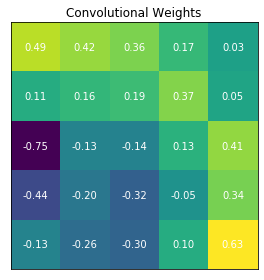

In [63]:
show_weight(model.conv.weight[0][0], "Convolutional Weights")

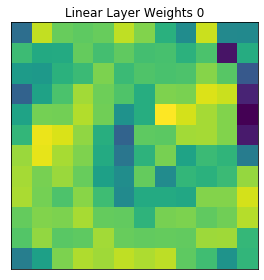

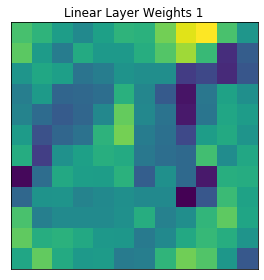

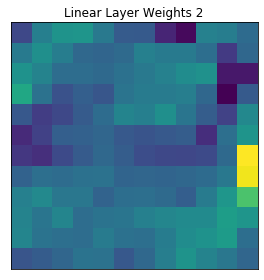

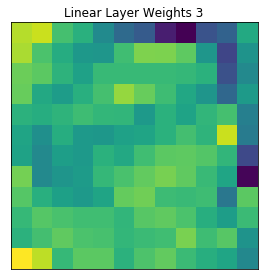

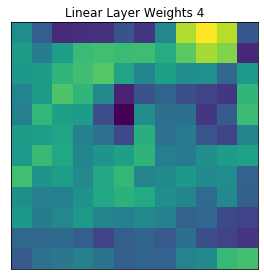

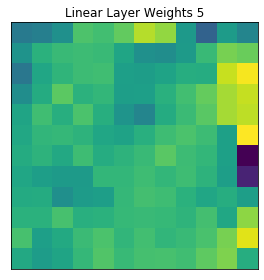

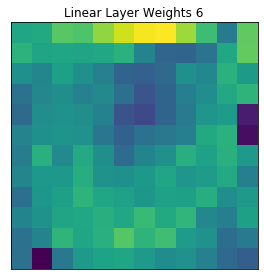

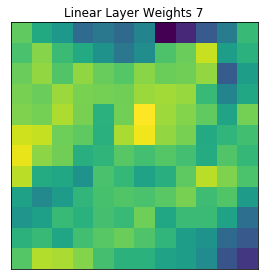

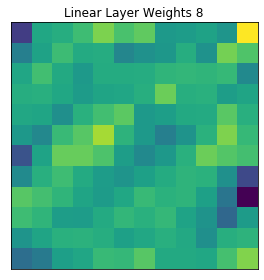

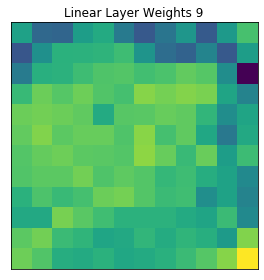

In [67]:
for i in range(10):
    show_weight(model.fc.weight[i].reshape(12,12), f"Linear Layer Weights {i}", show_values=False)

tensor(9)


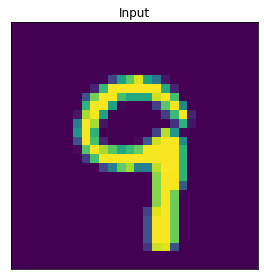

In [68]:
data, target = next(iter(test_loader))
print(target[0])
show_weight(data[0][0], title="Input", show_values=False)

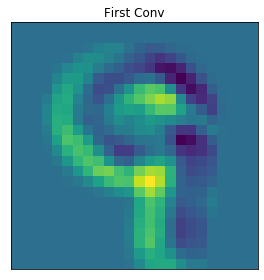

In [69]:
img = data[0].unsqueeze(dim=0)
conv_ret = model.conv(img)
show_weight(conv_ret[0][0], title="First Conv", show_values=False)

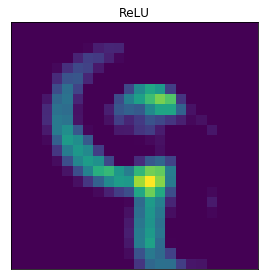

In [70]:
relu_ret = relu(conv_ret)
show_weight(relu_ret[0][0], title="ReLU", show_values=False)

torch.Size([1, 1, 24, 24])
torch.Size([1, 1, 12, 12])


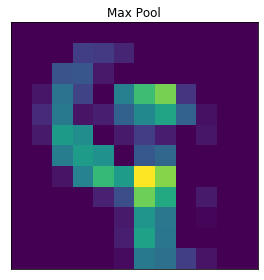

In [71]:
print(relu_ret.shape)
max_pool_ret = max_pool2d(relu_ret, 2, 2)
print(max_pool_ret.shape)
show_weight(max_pool_ret[0][0], title="Max Pool", show_values=False)

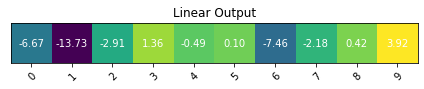

In [72]:
fc_ret = max_pool_ret.view(-1, 144)
fc_ret = model.fc(fc_ret)
show_weight(fc_ret, title="Linear Output", show_values=True, x_labels=range(0, 10))